In [1]:
from pykrx import stock
import numpy as np
import collections
import pandas as pd
from tqdm import tqdm

# 종목 코드 가져오기 (종목명 또는 종목 코드를 사용할 수 있습니다)
# 예: 삼성전자 종목 코드
code = '005930'

# 특정 종목의 일별 주가 데이터 가져오기
df = stock.get_market_ohlcv_by_date("20230101", "20231001", code)

# 종목 정보 가져오기
info = stock.get_market_ticker_name(code)

# 출력
print("종목 코드:", code)
print("일별 주가 데이터:")
print(df)
print("종목 정보:")
print(info)

종목 코드: 005930
일별 주가 데이터:
               시가     고가     저가     종가       거래량
날짜                                              
2023-01-02  55500  56100  55200  55500  10031448
2023-01-03  55400  56000  54500  55400  13547030
2023-01-04  55700  58000  55600  57800  20188071
2023-01-05  58200  58800  57600  58200  15682826
2023-01-06  58300  59400  57900  59000  17334989
...           ...    ...    ...    ...       ...
2023-09-21  69200  69800  68800  68900  10796336
2023-09-22  68300  68900  68300  68800   9897840
2023-09-25  68500  69700  68500  69400  13582516
2023-09-26  70000  70000  68400  68600  13143470
2023-09-27  68600  69100  68200  68400  14886491

[185 rows x 5 columns]
종목 정보:
삼성전자


In [2]:
test = stock.get_market_ohlcv_by_date("20230901", "20231010", code)
test = test.reset_index()
tp = test['종가'] - test['시가']
ans = []
for i in tp:
    if i >= 0:
        ans.append(1)
    else:
        ans.append(0)
        
test['sudo'] = ans
test

,날짜,시가,고가,저가,종가,거래량,sudo
0,2023-09-01,66800,71000,66700,71000,29738235,1
1,2023-09-04,72900,72900,70700,71200,26286495,0
2,2023-09-05,70900,71500,70200,70700,12330239,0
3,2023-09-06,70700,70800,69700,70000,11414620,0
4,2023-09-07,70000,70600,69600,70400,13741241,1
5,2023-09-08,70200,70300,69600,70300,10688118,1
6,2023-09-11,70400,70800,70000,70800,11785462,1
7,2023-09-12,70800,71000,70400,70500,11688599,0
8,2023-09-13,71100,71600,70300,70900,15955797,0
9,2023-09-14,71200,71800,70800,71700,21041407,1


In [3]:
df = stock.get_market_ohlcv_by_date("20100101", "20230901", code)
df = df.reset_index()
tp = df['종가'] - df['시가']
ans = []
for i in tp:
    if i >= 0:
        ans.append(1)
    else:
        ans.append(0)
        
df['sudo'] = ans
df.head(30)

,날짜,시가,고가,저가,종가,거래량,sudo
0,2010-01-04,16060,16180,16000,16180,239271,1
1,2010-01-05,16520,16580,16300,16440,559219,0
2,2010-01-06,16580,16820,16520,16820,459755,1
3,2010-01-07,16820,16820,16260,16260,443237,0
4,2010-01-08,16400,16420,16120,16420,295798,1
5,2010-01-11,16420,16460,15940,15940,398901,0
6,2010-01-12,15940,16180,15900,16180,384460,1
7,2010-01-13,16100,16119,15940,15940,267619,0
8,2010-01-14,16120,16620,16000,16540,532705,1
9,2010-01-15,16640,16860,16580,16840,398401,1


In [4]:
df.tail(5)

,날짜,시가,고가,저가,종가,거래량,sudo
3370,2023-08-28,66800,67000,66500,66800,5824628,1
3371,2023-08-29,66900,67200,66600,66800,9114352,0
3372,2023-08-30,67300,67700,67100,67100,9181223,0
3373,2023-08-31,67100,67200,66400,66900,15964630,0
3374,2023-09-01,66800,71000,66700,71000,29738235,1


In [5]:
simulation = pd.DataFrame([str(ans[i-4])+ 
                           str(ans[i-3])+
                           str(ans[i-2])+
                           str(ans[i-1])+
                           str(ans[i]) for i in range(4,len(ans))])
simulation.columns = ['sudo']
proba = pd.DataFrame(simulation.value_counts(),columns=['count']).reset_index().sort_values('sudo')
proba['case'] = [i[:4] for i in proba['sudo']]
proba

,sudo,count,case
31,00000,80,0000
23,00001,100,0000
28,00010,96,0001
10,00011,109,0001
11,00100,107,0010
18,00101,103,0010
3,00110,116,0011
4,00111,115,0011
20,01000,102,0100
9,01001,110,0100


In [6]:
proba = proba.loc[:,['count','case']]
proba = proba.reset_index(drop=True)
proba

,count,case
0,80,0000
1,100,0000
2,96,0001
3,109,0001
4,107,0010
5,103,0010
6,116,0011
7,115,0011
8,102,0100
9,110,0100


In [37]:
sim_bagging = pd.DataFrame()

In [54]:
simul = pd.DataFrame()
# np.random.seed(42)
mc = 100
for i in tqdm(range(mc)):
    data = list(df.sudo)
    feed = 1
    for _ in range(len(test)):
        target = str(data[-4]) + str(data[-3]) + str(data[-2]) + str(data[-1])
        tp = proba[proba['case'] == target].reset_index(drop=True)
        # print(tp)
        if data[-1] == 0:
            if int(np.random.uniform(0,10000))/10000 > tp.loc[1,'count']/sum(tp['count']) + 0.002*feed:
                data.append(0)
                feed += 1
            else:
                data.append(1)
                feed = 1
        else:
            if int(np.random.uniform(0,10000))/10000 > tp.loc[1,'count']/sum(tp['count']) - 0.001*feed:
                data.append(0)
                feed = 1
            else:
                data.append(1)
                feed += 1
    simul[f'MC{i}'] = data[-len(test):]
sim_bagging['bag5'] = simul.sum(axis=1)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 95.65it/s]


In [55]:
test['sim'] = simul.sum(axis=1)
test

,날짜,시가,고가,저가,종가,거래량,sudo,sim
0,2023-09-01,66800,71000,66700,71000,29738235,1,59
1,2023-09-04,72900,72900,70700,71200,26286495,0,50
2,2023-09-05,70900,71500,70200,70700,12330239,0,46
3,2023-09-06,70700,70800,69700,70000,11414620,0,50
4,2023-09-07,70000,70600,69600,70400,13741241,1,52
5,2023-09-08,70200,70300,69600,70300,10688118,1,49
6,2023-09-11,70400,70800,70000,70800,11785462,1,61
7,2023-09-12,70800,71000,70400,70500,11688599,0,54
8,2023-09-13,71100,71600,70300,70900,15955797,0,44
9,2023-09-14,71200,71800,70800,71700,21041407,1,58


In [49]:
sim_bagging['label'] = test['sudo']
sim_bagging

,bag1,bag2,bag3,bag4,bag5,label
0,49,49,60,50,51,1
1,54,45,55,54,49,0
2,47,47,43,52,53,0
3,56,56,52,50,63,0
4,50,59,51,52,48,1
5,51,50,44,68,44,1
6,55,47,55,57,58,1
7,58,47,50,50,50,0
8,47,46,55,52,56,0
9,56,53,55,47,55,1


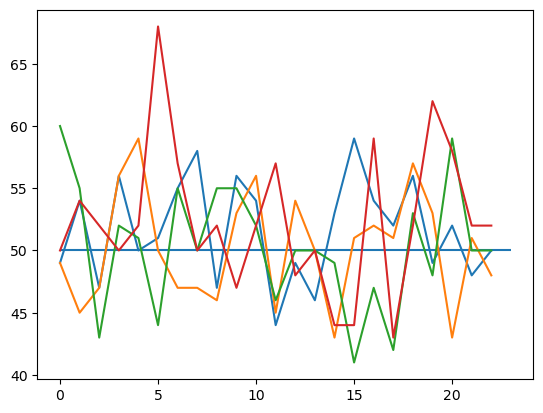

In [64]:
import matplotlib.pyplot as plt
plt.hlines(50,0,23)
plt.plot(sim_bagging.bag1)
plt.plot(sim_bagging.bag2)
plt.plot(sim_bagging.bag3)
plt.plot(sim_bagging.bag4)